In [2]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'


from IPython.display import Image



from pylab import rcParams
from sklearn.preprocessing import scale
from collections import Counter


In [3]:
EOS_FAM = pd.read_csv('EOS.csv', delimiter=';')

In [4]:
EOS_FAM.head()

,NUMBER,NAME,DESIG,FAM,S,CLASS,S.1,F,DIA,S.2,...,F.3,AMIN,AMAX,U,NOTES,BIN,PRI,SAM,SD,WF
0,221.0,Eos,NaN,EOS,S,K,S,NaN,103.87,M,...,NaN,0.05,0.12,3.0,NaN,NaN,NaN,Y,NaN,NaN
1,320.0,Katharina,NaN,EOS,A,S,C,NaN,24.57,M,...,NaN,0.19,0.21,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2,339.0,Dorothea,1892 G,EOS,S,K,S,NaN,38.25,M,...,NaN,0.06,0.10,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,450.0,Brigitta,1899 EV,EOS,T,CSU,D,NaN,33.46,M,...,NaN,0.22,0.31,3.0,NaN,NaN,NaN,Y,NaN,NaN
4,513.0,Centesima,1903 LY,EOS,S,K,S,NaN,50.15,M,...,NaN,0.18,0.45,3.0,NaN,NaN,NaN,Y,NaN,NaN


In [13]:
EOS_FAM.describe()

,NUMBER,F,DIA,H,B,F.1,ALBEDO,PERIOD,P,DESC,AMIN,AMAX,U,BIN
count,473.000000,0.0,474.00000,474.000000,0.0,0.0,474.000000,459.000000,0.0,0.0,119.000000,421.000000,455.000000,0.0
mean,38290.568710,NaN,13.82711,12.674873,NaN,NaN,0.139104,21.625651,NaN,NaN,0.304286,0.432494,2.206593,NaN
std,70857.744179,NaN,11.08659,1.671857,NaN,NaN,0.016482,71.730435,NaN,NaN,0.195628,0.242774,0.506739,NaN
min,221.000000,NaN,1.56000,7.670000,NaN,NaN,0.057000,1.330000,NaN,NaN,0.020000,0.040000,1.000000,NaN
25%,2889.000000,NaN,6.08750,11.400000,NaN,NaN,0.140000,5.274350,NaN,NaN,0.160000,0.250000,2.000000,NaN
50%,9826.000000,NaN,10.73000,12.600000,NaN,NaN,0.140000,7.396000,NaN,NaN,0.250000,0.400000,2.000000,NaN
75%,39886.000000,NaN,18.77500,13.832500,NaN,NaN,0.140000,11.929900,NaN,NaN,0.430000,0.570000,3.000000,NaN
max,428958.000000,NaN,103.87000,16.780000,NaN,NaN,0.291900,975.095000,NaN,NaN,0.900000,1.800000,3.000000,NaN


Tenemos 474 asteroides, de los cuales tienen:

474, el valor del diámetro

119, el valor de la amplitud mínima

421, el valor de la amplitud máxima

459, el valor del periodo

In [14]:
#Limpiando data incompleta
EOS_FAM.replace([np.inf, -np.inf], np.nan)
CEOS=EOS_FAM.dropna(subset=['DIA', 'AMAX', 'PERIOD'])
#new_EOS_FAM = EOS_FAM.drop('DIA',axis ='columns')
freq3=(24)/(np.array(CEOS['PERIOD']))

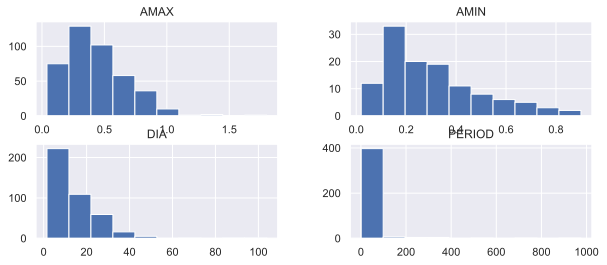

In [15]:
hist1 = ['DIA', 'AMIN', 'AMAX', 'PERIOD']
CEOS[hist1].hist(figsize=(10, 4));

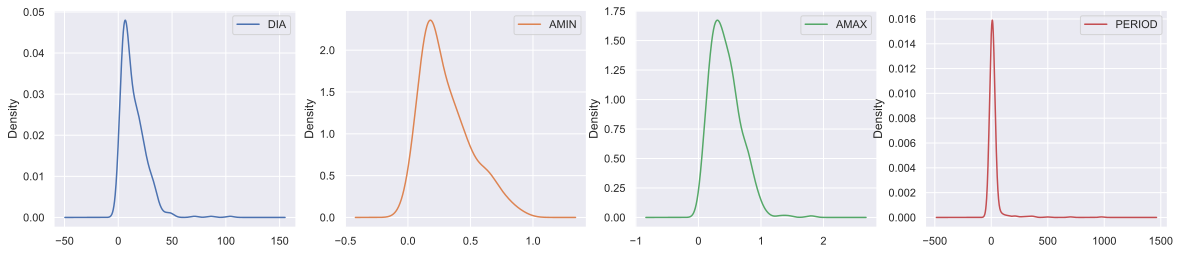

In [26]:
CEOS[hist1].plot(kind='density', subplots=True, layout=(1, 4), 
                  sharex=False, figsize=(20,4)); 

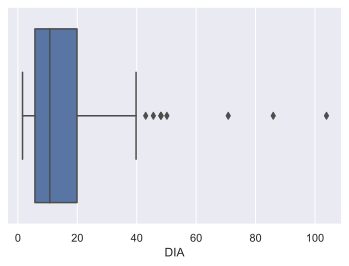

In [18]:
sns.boxplot(x='DIA', data=CEOS);


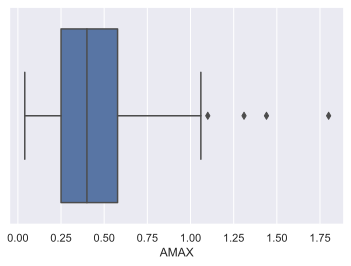

In [19]:
sns.boxplot(x='AMAX', data=CEOS);


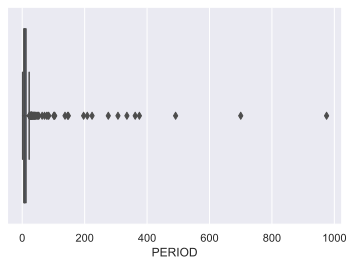

In [20]:
sns.boxplot(x='PERIOD', data=CEOS);


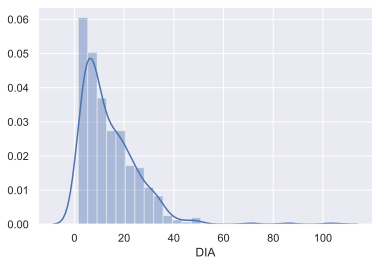

In [27]:
sns.distplot(CEOS['DIA'])

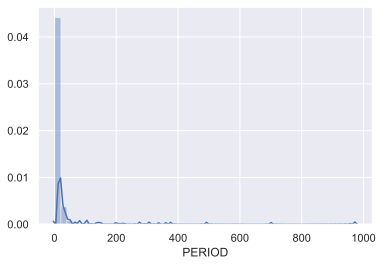

In [29]:
sns.distplot(CEOS['PERIOD'])

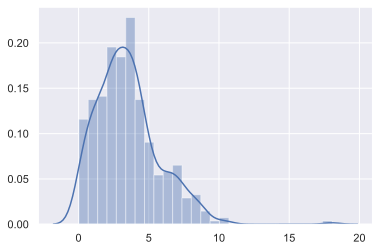

In [30]:
sns.distplot(freq3)

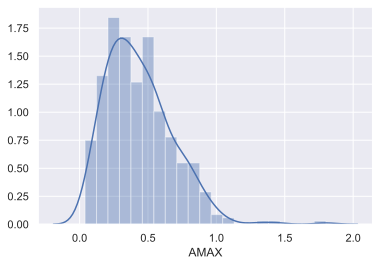

In [32]:
sns.distplot(CEOS['AMAX'])

In [21]:
CEOS[hist1].describe()

,DIA,AMIN,AMAX,PERIOD
count,414.000000,119.000000,414.000000,414.000000
mean,14.220556,0.304286,0.435314,22.816185
std,11.636805,0.195628,0.243009,75.290473
min,1.560000,0.020000,0.040000,1.330000
25%,5.732500,0.160000,0.250000,5.278250
50%,10.730000,0.250000,0.400000,7.408000
75%,19.895000,0.430000,0.577500,12.088750
max,103.870000,0.900000,1.800000,975.095000


In [22]:
CEOS.corr()

,NUMBER,F,DIA,H,B,F.1,ALBEDO,PERIOD,P,DESC,AMIN,AMAX,U,BIN
NUMBER,1.000000,NaN,-0.451023,0.714180,NaN,NaN,0.015377,0.029095,NaN,NaN,0.426694,0.288935,-0.242395,NaN
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIA,-0.451023,NaN,1.000000,-0.878818,NaN,NaN,0.001030,-0.079655,NaN,NaN,-0.531030,-0.268820,0.506598,NaN
H,0.714180,NaN,-0.878818,1.000000,NaN,NaN,-0.048772,0.081408,NaN,NaN,0.593059,0.327959,-0.507589,NaN
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALBEDO,0.015377,NaN,0.001030,-0.048772,NaN,NaN,1.000000,0.002937,NaN,NaN,-0.136013,0.005927,0.080619,NaN
PERIOD,0.029095,NaN,-0.079655,0.081408,NaN,NaN,0.002937,1.000000,NaN,NaN,-0.027527,0.166590,-0.056983,NaN
P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DESC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


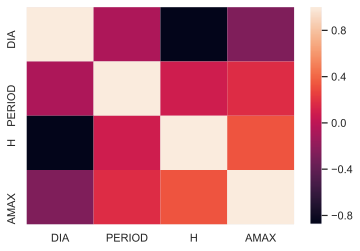

In [25]:
numerical = list(set(['DIA','AMAX','PERIOD', 'H']))
corr_matrix = EOS_FAM[numerical].corr()
sns.heatmap(corr_matrix);


Text(0, 0.5, 'Amplitud Máxima')

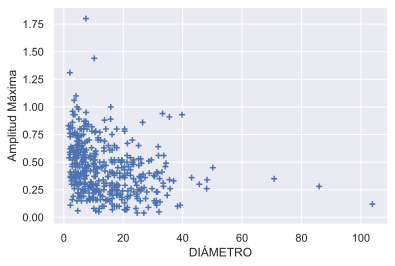

In [37]:
plt.scatter(CEOS['DIA'], CEOS['AMAX'],marker='+');
plt.xlabel('DIÁMETRO', fontdict=None, labelpad=None)
plt.ylabel('Amplitud Máxima', fontdict=None, labelpad=None)

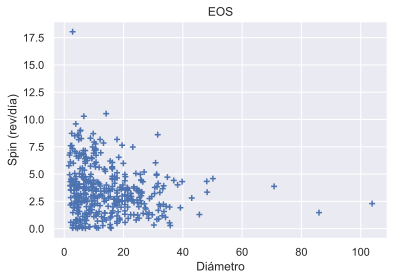

In [38]:
plt.scatter(CEOS['DIA'], freq3,marker='+');
plt.title("EOS")
plt.xlabel("Diámetro")
plt.ylabel("Spin (rev/día)")
plt.show()

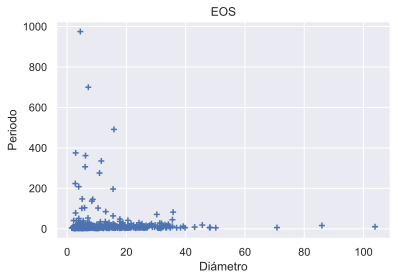

In [39]:
plt.scatter(CEOS['DIA'], CEOS['PERIOD'],marker='+');
plt.title("EOS")
plt.xlabel("Diámetro")
plt.ylabel("Periodo")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001773A3FD898>]],
      dtype=object)

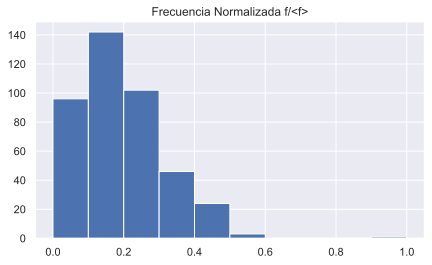

In [40]:
# NORMALIZANDO LAS FRECUENCIAS
z3= (freq3 - min(freq3))/(max(freq3)-min(freq3))
zz3=z3.tolist()
#type(zz)

zzz3=pd.DataFrame(zz3)
zzz3.columns=['Frecuencia Normalizada f/<f>']
#type(zzz)
#print(zzz)
zzz3.hist(figsize=(7, 4))


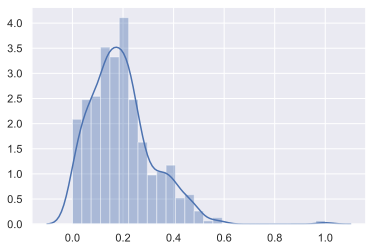

In [41]:
sns.distplot(zzz3)

# EXTRA

Text(0, 0.5, 'Magnitud Absoluta')

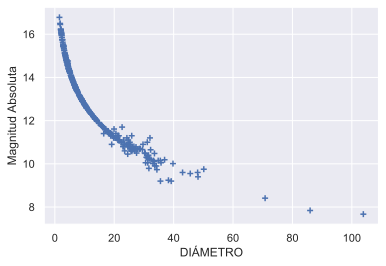

In [43]:
plt.scatter(CEOS['DIA'], CEOS['H'], marker='+');
plt.xlabel('DIÁMETRO', fontdict=None, labelpad=None)
plt.ylabel('Magnitud Absoluta', fontdict=None, labelpad=None)

Text(0, 0.5, 'Magnitud Absoluta')

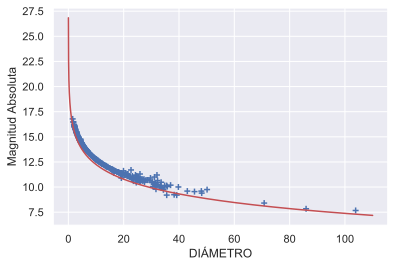

In [45]:
x= np.array(CEOS['DIA'])
y= np.array(CEOS['H'])

np.polyfit(np.log(x),y,1)
s=np.linspace(0.01,110,10000)
t=-2.11196268*np.log(s) + 17.10944524

plt.plot(s,t, 'r')
plt.scatter(CEOS['DIA'], CEOS['H'], marker='+');
plt.xlabel('DIÁMETRO', fontdict=None, labelpad=None)
plt.ylabel('Magnitud Absoluta', fontdict=None, labelpad=None)